# Extracting condition-specific trials

The aim of this section is to extract the trials according to the condition labels derived from the trigger channels. Once the trials are extracted, bad epochs will be identified and excluded based on their peak-to-peak signal amplitude.

## Preparation
### Import the necessary modules
Below are the required Python modules to be imported


In [1]:
import os.path as op
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne_bids import BIDSPath, read_raw_bids


### File overview

The chapter relies on the input file (embedded in the BIDS structure):

< BIDS_ROOT >/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ica_raw.fif


< BIDS_ROOT >/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ann.fif


and generates the output files

< BIDS_ROOT >/derivatives/Analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-12_epo.fif

Set the paths for the data and results. Note that these will depend on your local setup.


In [2]:
subject = '01'
session = '01'
task = 'SpAtt'
run = '01'
meg_suffix = 'meg'
ica_suffix = 'ica_raw'
epo_suffix = 'epo'

#data_path='C:/Users/rakshita/Documents/Cerca_raw_files'
data_path = '/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif'

bids_root = op.join(data_path, "Cerca_Spatt_BIDS")
deriv_root1 = op.join(bids_root, "derivatives/preprocessing")
deriv_root2=op.join(bids_root, "derivatives/analysis")

bids_path_preproc = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=ica_suffix, datatype='meg',
            root=deriv_root1, extension='.fif', check=False)


bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=epo_suffix, datatype='meg',
            root=deriv_root2, extension='.fif', check=False).mkdir()
  
deriv_fname = bids_path

print(bids_path_preproc.fpath)
print(deriv_fname)

/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ica_raw.fif
/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_epo.fif



## Reading the events from the stimulus channels

First, read all the raw data fron the previous section in which artefacts were attenuated by ICA:

In [3]:
raw = read_raw_bids(bids_path=bids_path_preproc, extra_params={'preload':False},verbose=True)

Opening raw data file /Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ica_raw.fif...
    Read a total of 8 projection items:
        HFC: l=1 m=-1 (1 x 180) active
        HFC: l=1 m=0 (1 x 180) active
        HFC: l=1 m=1 (1 x 180) active
        HFC: l=2 m=-2 (1 x 180) active
        HFC: l=2 m=-1 (1 x 180) active
        HFC: l=2 m=0 (1 x 180) active
        HFC: l=2 m=1 (1 x 180) active
        HFC: l=2 m=2 (1 x 180) active
    Range : 0 ... 1539807 =      0.000 ...  2053.076 secs
Ready.


/var/folders/n0/w7vb4jpn0nx3hs95f4p7r9br0000gr/T/ipykernel_28343/1308987296.py:1: RuntimeWarning: Did not find any events.tsv associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/preprocessing/sub-01/**/meg/sub-01_ses-01*events.tsv"
  raw = read_raw_bids(bids_path=bids_path_preproc, extra_params={'preload':False},verbose=True)
/var/folders/n0/w7vb4jpn0nx3hs95f4p7r9br0000gr/T/ipykernel_28343/1308987296.py:1: RuntimeWarning: Did not find any channels.tsv associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/preprocessing/sub-01/**/meg/sub-01_ses-01*channels.tsv"
  raw = read_raw_bids(bids_path=bids_path_preproc, extra_params={'preload':False},verbose=True)
/var/folders/n0/w7vb4jpn0nx3hs95f4p7r9br0000gr/T/ipykernel_28343/1308987296.py:1: RuntimeWarning: Di

The following code will read the events according to annotations assigned with the BIDS formatting was done:

In [4]:
events, events_id = mne.events_from_annotations(raw,event_id='auto')

Used Annotations descriptions: ['blink', 'blkEnd', 'blkStart', 'catchOnset', 'cue_Left', 'cue_Right', 'dotOnLeft', 'dotOnRight', 'resp', 'stimOnset']


The annotations are represented in the array *events* where the first column is the sample and the third column the corresponding trigger value. The *events_id* is a dictionary of event names and trigger codes.

To visualise the *event_id*s and a snippet of the *events*-array write: 

In [5]:
events_id

{'blink': 1,
 'blkEnd': 2,
 'blkStart': 3,
 'catchOnset': 4,
 'cue_Left': 5,
 'cue_Right': 6,
 'dotOnLeft': 7,
 'dotOnRight': 8,
 'resp': 9,
 'stimOnset': 10}

In [6]:
events[100:120]

array([[102595,      0,     10],
       [103699,      0,      8],
       [103905,      0,      1],
       [103975,      0,      9],
       [105271,      0,      1],
       [105542,      0,      5],
       [106445,      0,     10],
       [106524,      0,      7],
       [106888,      0,      9],
       [109267,      0,      5],
       [110170,      0,     10],
       [111374,      0,      7],
       [111688,      0,      9],
       [112967,      0,      5],
       [113417,      0,      1],
       [113870,      0,     10],
       [114887,      0,      7],
       [115121,      0,      1],
       [115188,      0,      9],
       [115447,      0,      1]])

To visualise the marked events along with the time course of the raw data in a browsing window, write:

In [7]:
%matplotlib inline
raw.plot(start=500)

Using qt as 2D backend.
Using pyopengl with version 3.1.6


<mne_qt_browser._pg_figure.MNEQtBrowser(0x292179de0) at 0x28f3e2fc0>

## Defining the epochs (trials) according to the event values

The next step is to extract the left and right trials of the data defined according to respectively *cue_Left* and *cue_Right*

In [8]:
bids_path_preproc.update(run='01')
raw = read_raw_bids(bids_path=bids_path_preproc, 
                    extra_params={'preload': True}, 
                    verbose=True)
events, events_id = mne.events_from_annotations(raw, event_id='auto')

raw_list = [raw]
events_list = [events]

events_picks_id = {k: v for k, v in events_id.items() if k.startswith('cue') or k.startswith('stim')};

Opening raw data file /Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ica_raw.fif...
    Read a total of 8 projection items:
        HFC: l=1 m=-1 (1 x 180) active
        HFC: l=1 m=0 (1 x 180) active
        HFC: l=1 m=1 (1 x 180) active
        HFC: l=2 m=-2 (1 x 180) active
        HFC: l=2 m=-1 (1 x 180) active
        HFC: l=2 m=0 (1 x 180) active
        HFC: l=2 m=1 (1 x 180) active
        HFC: l=2 m=2 (1 x 180) active
    Range : 0 ... 1539807 =      0.000 ...  2053.076 secs
Ready.
Reading 0 ... 1539807  =      0.000 ...  2053.076 secs...
Used Annotations descriptions: ['blink', 'blkEnd', 'blkStart', 'catchOnset', 'cue_Left', 'cue_Right', 'dotOnLeft', 'dotOnRight', 'resp', 'stimOnset']


/var/folders/n0/w7vb4jpn0nx3hs95f4p7r9br0000gr/T/ipykernel_28343/3474265422.py:2: RuntimeWarning: Did not find any events.tsv associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/preprocessing/sub-01/**/meg/sub-01_ses-01*events.tsv"
  raw = read_raw_bids(bids_path=bids_path_preproc,
/var/folders/n0/w7vb4jpn0nx3hs95f4p7r9br0000gr/T/ipykernel_28343/3474265422.py:2: RuntimeWarning: Did not find any channels.tsv associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str was "/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/preprocessing/sub-01/**/meg/sub-01_ses-01*channels.tsv"
  raw = read_raw_bids(bids_path=bids_path_preproc,
/var/folders/n0/w7vb4jpn0nx3hs95f4p7r9br0000gr/T/ipykernel_28343/3474265422.py:2: RuntimeWarning: Did not find any meg.json associated with sub-01_ses-01_task-SpAtt_run-01.

The search_str w

As a check, print the picked ids:

In [9]:
print(events_picks_id)

{'cue_Left': 5, 'cue_Right': 6, 'stimOnset': 10}


Set the peak-to-peak amplitude thresholds for trial rejection. This is an extra setting for ensuring that trials with excessive artefacts are rejected. Eventually, this should be implemented as an annotation in the Artefect Rejection chapter. 
These values may change depending on the quality of the data.

In [10]:
reject = dict(mag=1e-11)

Waiting for Loading-Thread to finish... (max. 10 sec)


/Users/o.jensen@bham.ac.uk/Applications/MNE-Python/1.9.0_0/.mne-python/lib/python3.12/site-packages/mne_qt_browser/_pg_figure.py:3061: RuntimeWarning: Failed to disconnect (None) from signal "triggered()".
  sig.disconnect()


Channels marked as bad:
none


Time windows of interest are -0.75 to 2 s epochs aligned to the onset of the left and right cues. Now perform the epoching:

In [11]:
epochs = mne.Epochs(raw,
            events, events_picks_id,
            tmin=-0.75 , tmax=2,
            baseline=None,
            proj=False,
            picks = 'all',
            detrend = 1,
            reject=reject,
            reject_by_annotation=True,
            preload=True,
            verbose=False)

To display the details of the epochs write

In [12]:
epochs

<Epochs | 407 events (all good), -0.749 – 2 s (baseline off), ~1.30 GiB, data loaded,
 'cue_Left': 113
 'cue_Right': 106
 'stimOnset': 188>

Note that there are 178 cue left trials and 180 cue right trials and 322 trials with stimulus onset

Now plot an overview of the rejected epochs:


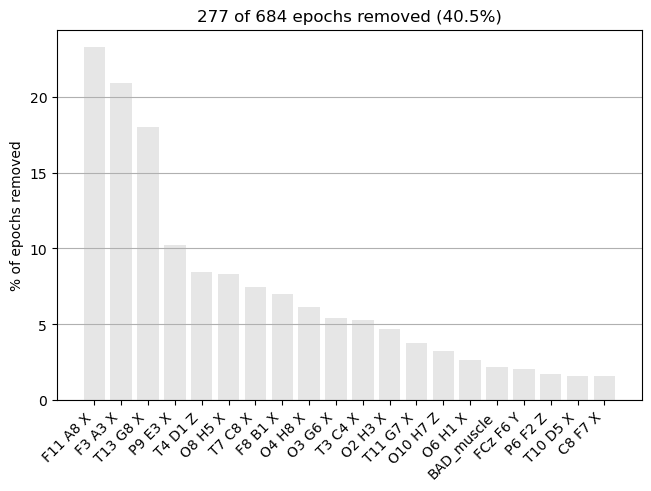

In [13]:
%matplotlib inline
epochs.plot_drop_log();



A small percentage of the trials were rejected due to artefacts in the magnetometers.

Now we save the epoched data in an FIF-file. 



In [14]:
print(deriv_fname)

/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_epo.fif


In [15]:
epochs.save(deriv_fname, overwrite=True)

Overwriting existing file.
Overwriting existing file.


[PosixPath('/Users/o.jensen@bham.ac.uk/Library/CloudStorage/Dropbox/FLUX/OPM-Oxf/fif/Cerca_Spatt_BIDS/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_epo.fif')]


## Plotting the trials

To show the trials for the left cue condition for the OPM sensors:

In [18]:
OPMZ = [item for item in epochs.ch_names if item.endswith("Z") and not item.startswith("BNC")]
epochs['cue_Left'].plot(picks=OPMZ)

Using pyopengl with version 3.1.6


<mne_qt_browser._pg_figure.MNEQtBrowser(0x133895a10) at 0x294cd06c0>

Traceback (most recent call last):
  File "/Users/o.jensen@bham.ac.uk/Applications/MNE-Python/1.9.0_0/.mne-python/lib/python3.12/site-packages/mne_qt_browser/_pg_figure.py", line 4841, in keyPressEvent
    slot()
  File "/Users/o.jensen@bham.ac.uk/Applications/MNE-Python/1.9.0_0/.mne-python/lib/python3.12/site-packages/mne_qt_browser/_pg_figure.py", line 4572, in _toggle_annotations
    self.mne.annotations_visible = not self.mne.annotations_visible
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'BrowserParams' object has no attribute 'annotations_visible'
Traceback (most recent call last):
  File "/Users/o.jensen@bham.ac.uk/Applications/MNE-Python/1.9.0_0/.mne-python/lib/python3.12/site-packages/mne_qt_browser/_pg_figure.py", line 4841, in keyPressEvent
    slot()
  File "/Users/o.jensen@bham.ac.uk/Applications/MNE-Python/1.9.0_0/.mne-python/lib/python3.12/site-packages/mne_qt_browser/_pg_figure.py", line 4572, in _toggle_annotations
    self.mne.a

The plot above shows the trials cued to the left. 

To show all the trials belonging to left for a representative OPM Sensor (O6 H1 Z) use the plot_image function. In the following example we also lowpass filter the indvidual trials at 30 Hz and shorten them (crop) to a -100 to 400 ms interval:


Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 24751 samples (33.001 s)



/var/folders/n0/w7vb4jpn0nx3hs95f4p7r9br0000gr/T/ipykernel_27852/1170201542.py:1: RuntimeWarning: filter_length (24751) is longer than the signal (2063), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['cue_Left'].filter(0.1,30).crop(-0.1,0.4).apply_baseline(baseline=(-0.1, 0)).plot_image(picks=['F12 D8 Z'], vmin=-2500, vmax=2500);
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: 

Applying baseline correction (mode: mean)
Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated


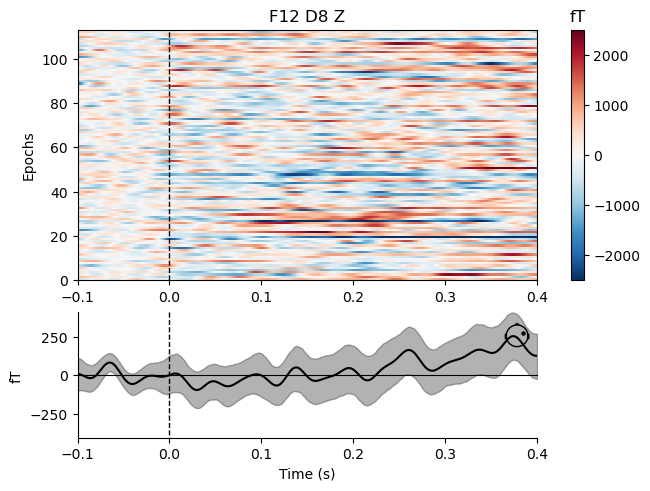

In [18]:
epochs['cue_Left'].filter(0.1,30).crop(-0.1,0.4).apply_baseline(baseline=(-0.1, 0)).plot_image(picks=['F12 D8 Z'], vmin=-2500, vmax=2500);

## Preregistration and Publications

"Trials were extracted from the continuous data from –2.5 to 2 seconds around each event. No baseline correction was applied. A linear detrend was used to remove slow drifts. All channels were included, and bad trials were automatically excluded based on annotations. The data were preloaded for further analysis."